In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Question 1

In [80]:
temperature = {"Max" : [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],   
               "Min" : [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18],
               "month": np.arange(1,13)}

In [81]:
df = pd.DataFrame(temperature)

In [82]:
df.head()

,Max,Min,month
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5


In [89]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, df['month'],
                                      df['Max'], [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, df['month'],
                                      df['Min'], [-40, 20, 0])

Text(0, 0.5, 'Temperature (C)')

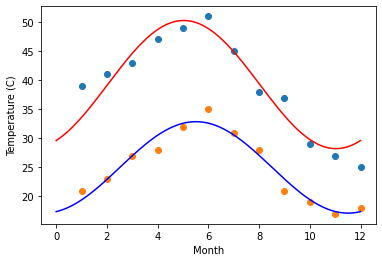

In [86]:
days = np.linspace(0, 12, num=365)
plt.scatter(x = "month", y = "Max", data=df)
plt.plot(days, yearly_temps(days, *res_max), 'r-', c="red")
plt.scatter(x = "month", y = "Min", data=df)
plt.plot(days, yearly_temps(days, *res_min), 'r-', c="blue")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")

# Question 2

In [57]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [58]:
titanic = pd.read_csv(url)

In [59]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [60]:
titanic['sex'].value_counts(normalize = True)

male      0.644003
female    0.355997
Name: sex, dtype: float64

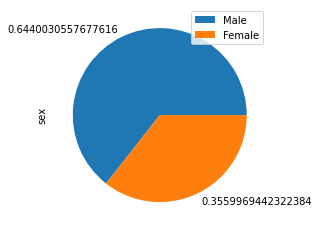

In [61]:
titanic['sex'].value_counts(normalize = True).plot(kind="pie", labels=titanic['sex'].value_counts(normalize = True).tolist())
plt.legend(['Male','Female'])

In [67]:
genders = {'male':0,'female':1}
titanic['sex_label'] = titanic['sex'].map(genders)

Text(0, 0.5, 'Age')

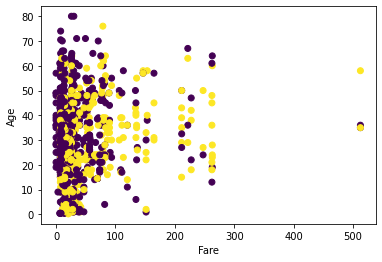

In [77]:
titanic.fillna(method = "ffill",inplace=True)
plt.scatter(x = "fare", y = "age", c = titanic["sex_label"], data=titanic)
plt.xlabel("Fare")
plt.ylabel("Age")

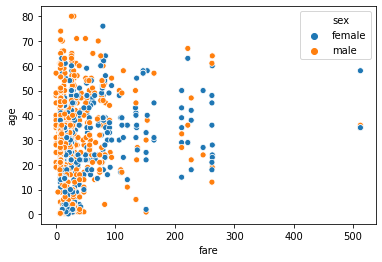

In [79]:
import seaborn as sns
sns.scatterplot(x = 'fare', y = 'age', hue = 'sex', data = titanic)